In [2]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import datetime
import lane_detection
import lane_following
import os

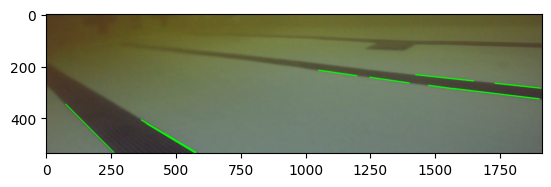

In [3]:
img = cv2.imread('516.jpg')
resized = (cv2.resize(img, (1912, 1069)))
h = resized.shape[0]
w = resized.shape[1]
againResized = resized[int(h/2) : h, 0 : w]
lines = lane_detection.detect_lines(againResized, 50, 50, 3, 100, 10)
weirdLines = lane_detection.draw_lines(againResized, lines)
cv2.imwrite('aaaaaa.jpg', weirdLines)
plt.imshow(weirdLines)

In [4]:
vid = cv2.VideoCapture('AUV_Vid.mkv')
vid.get(cv2.CAP_PROP_FPS)

1000.0

In [5]:
def writeImages(vid, start = 1, images = 10):
    dirname = 'vidFrames'
    if not os.path.exists(dirname):
        os.mkdir(dirname)
    
    if (start + images) > vid.get(cv2.CAP_PROP_FRAME_COUNT):
        raise Exception("Number of frames must not exceed number of frames in video.")

    count = 1
    ret, frame = vid.read()

    # change comments for set number of frames
    while True:
        if ret:
            print(ret)
            print(f"Frame: {count}")
            if count >= start and count < (start + images):
                cv2.imwrite(os.path.join(dirname, str(count)+".jpg"), frame)
            count += 1
            ret, frame = vid.read()
        else:
            ret, frame = vid.read()   
            if ret:
                if count >= start and count < (start + images):
                    cv2.imwrite(os.path.join(dirname, str(count)+".jpg"), frame)
                print(ret)
                print(f"Frame: {count}")
                count += 1
                ret, frame = vid.read()
            else: break
        if count > (start + images): break

In [6]:
writeImages(vid, 2170, 10)

True
Frame: 1
True
Frame: 2
True
Frame: 3
True
Frame: 4
True
Frame: 5
True
Frame: 6
True
Frame: 7
True
Frame: 8
True
Frame: 9
True
Frame: 10
True
Frame: 11
True
Frame: 12
True
Frame: 13
True
Frame: 14
True
Frame: 15
True
Frame: 16
True
Frame: 17
True
Frame: 18
True
Frame: 19
True
Frame: 20
True
Frame: 21
True
Frame: 22
True
Frame: 23
True
Frame: 24
True
Frame: 25
True
Frame: 26
True
Frame: 27
True
Frame: 28
True
Frame: 29
True
Frame: 30
True
Frame: 31
True
Frame: 32
True
Frame: 33
True
Frame: 34
True
Frame: 35
True
Frame: 36
True
Frame: 37
True
Frame: 38
True
Frame: 39
True
Frame: 40
True
Frame: 41
True
Frame: 42
True
Frame: 43
True
Frame: 44
True
Frame: 45
True
Frame: 46
True
Frame: 47
True
Frame: 48
True
Frame: 49
True
Frame: 50
True
Frame: 51
True
Frame: 52
True
Frame: 53
True
Frame: 54
True
Frame: 55
True
Frame: 56
True
Frame: 57
True
Frame: 58
True
Frame: 59
True
Frame: 60
True
Frame: 61
True
Frame: 62
True
Frame: 63
True
Frame: 64
True
Frame: 65
True
Frame: 66
True
Frame: 67
True

In [5]:

# lane_following.videoDetectionFrames(vid, 100)
lane_following.videoDetection(vid)

True
Frame: 1
True
Frame: 2
True
Frame: 3
True
Frame: 4
True
Frame: 5
True
Frame: 6
True
Frame: 7
True
Frame: 8
True
Frame: 9
True
Frame: 10
True
Frame: 11
True
Frame: 12
True
Frame: 13
True
Frame: 14
True
Frame: 15
True
Frame: 16
True
Frame: 17
True
Frame: 18
True
Frame: 19
True
Frame: 20
True
Frame: 21
True
Frame: 22
True
Frame: 23
True
Frame: 24
True
Frame: 25
True
Frame: 26
True
Frame: 27
True
Frame: 28
True
Frame: 29
True
Frame: 30
True
Frame: 31
True
Frame: 32
True
Frame: 33
True
Frame: 34
True
Frame: 35
True
Frame: 36
True
Frame: 37
True
Frame: 38
True
Frame: 39
True
Frame: 40
True
Frame: 41
True
Frame: 42
True
Frame: 43
True
Frame: 44
True
Frame: 45
True
Frame: 46
True
Frame: 47
True
Frame: 48
True
Frame: 49
True
Frame: 50
True
Frame: 51
True
Frame: 52
True
Frame: 53
True
Frame: 54
True
Frame: 55
True
Frame: 56
True
Frame: 57
True
Frame: 58
True
Frame: 59
True
Frame: 60
True
Frame: 61
True
Frame: 62
True
Frame: 63
True
Frame: 64
True
Frame: 65
True
Frame: 66
True
Frame: 67
True

/home/emily/cv-intro/lane_following.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  cenSl = 1/((1/slope[0] + 1/slope[1])/2) # center slope float


True
Frame: 2173
True
Frame: 2174


error: OpenCV(4.8.0) :-1: error: (-5:Bad argument) in function 'line'
> Overload resolution failed:
>  - Can't parse 'pt2'. Sequence item with index 0 has a wrong type
>  - Can't parse 'pt2'. Sequence item with index 0 has a wrong type
